In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plot style
plt.style.use('seaborn-whitegrid')
sns.set_palette('Set2')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

/var/folders/zw/y7lpjbyd3j7f8j3xd3glytlr0000gn/T/ipykernel_98956/2921721412.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# Step 2: Load the Dataset
# Load data
df = pd.read_csv('../data/raw/heart.csv')

# Display first few rows
print(f"Dataset shape: {df.shape}")
df.head()

# Step 3: Dataset Information
# Check data types and missing values
df.info()

# Step 4: Check for missing values
df.isnull().sum()

# Step 5: Statistical Summary
# Summary statistics
df.describe(include='all').T

Dataset shape: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


target
1    526
0    499
Name: count, dtype: int64
Distribution: target
1    51.317073
0    48.682927
Name: count, dtype: float64%


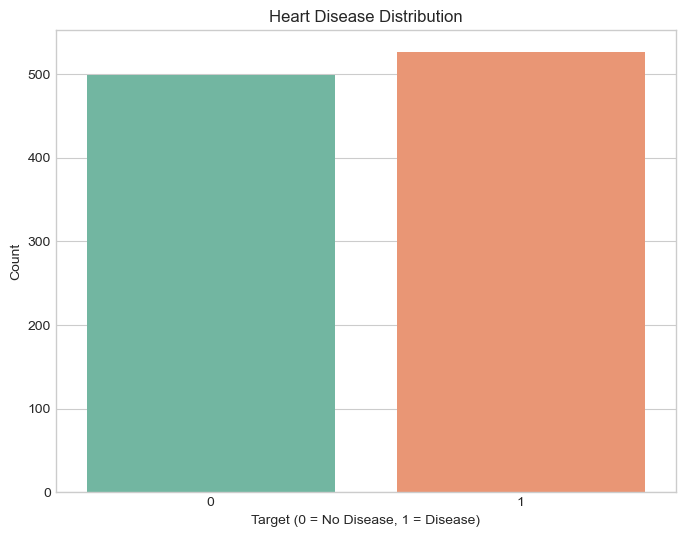

In [3]:
# Step 6: Target Variable Distribution
# Check target variable distribution
target_counts = df['target'].value_counts()
print(target_counts)
print(f"Distribution: {target_counts / len(df) * 100}%")

# Plot target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

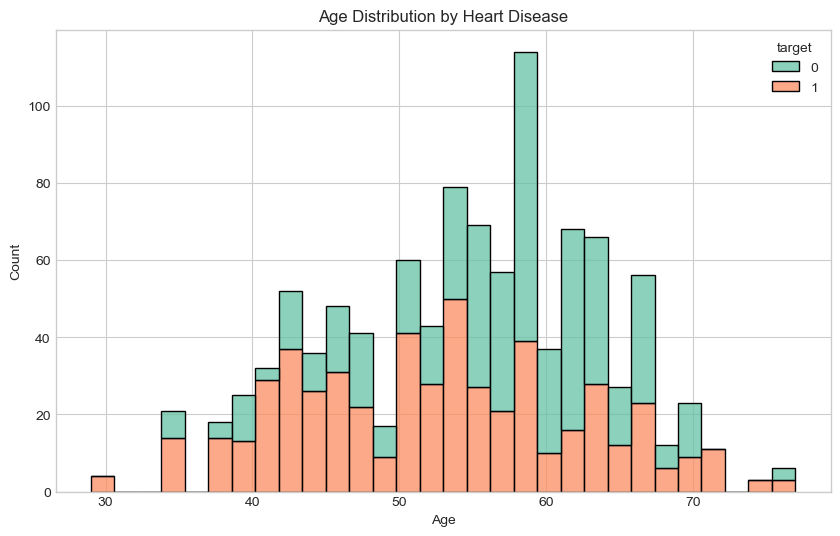

In [4]:
# Step 7: Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', bins=30)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

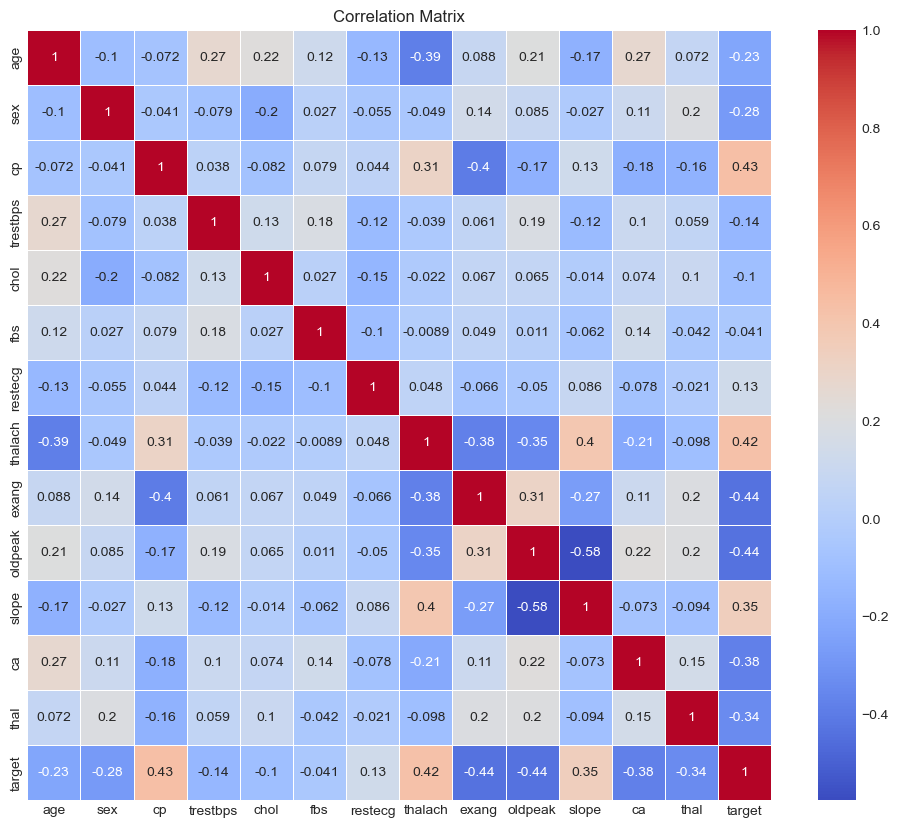

In [5]:
# Step 8: Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

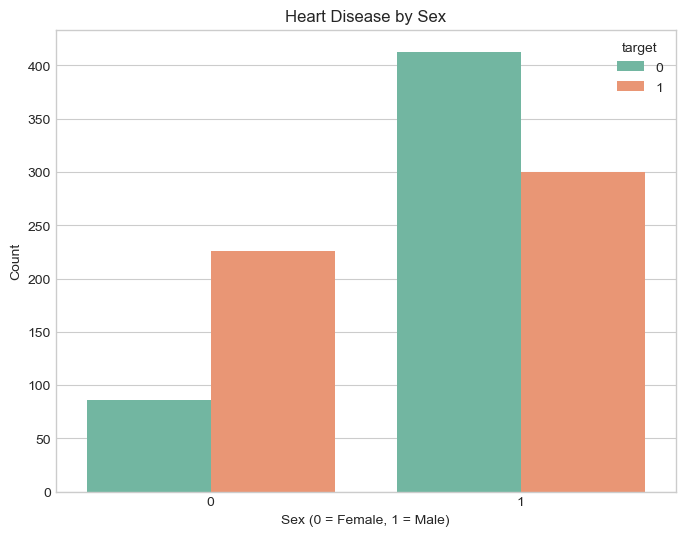

In [6]:
# Step 9: Sex distribution by target
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

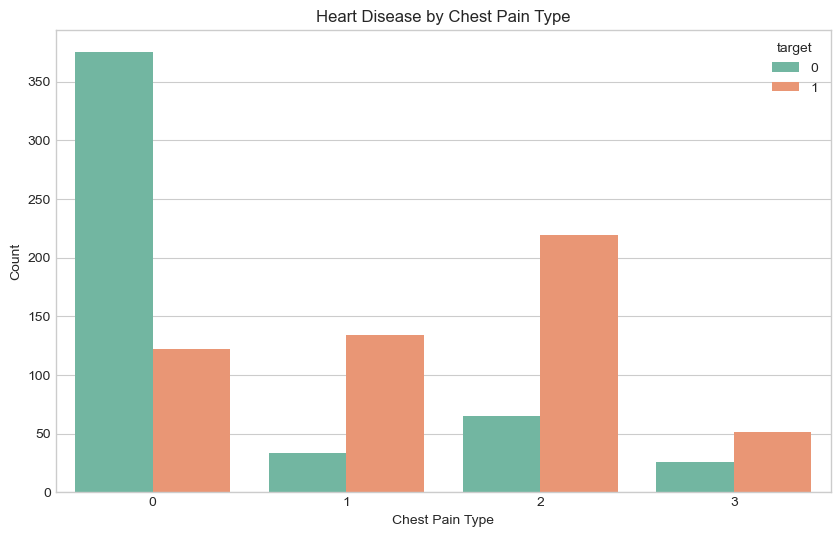

In [7]:
# Step 10: Chest pain type by target
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

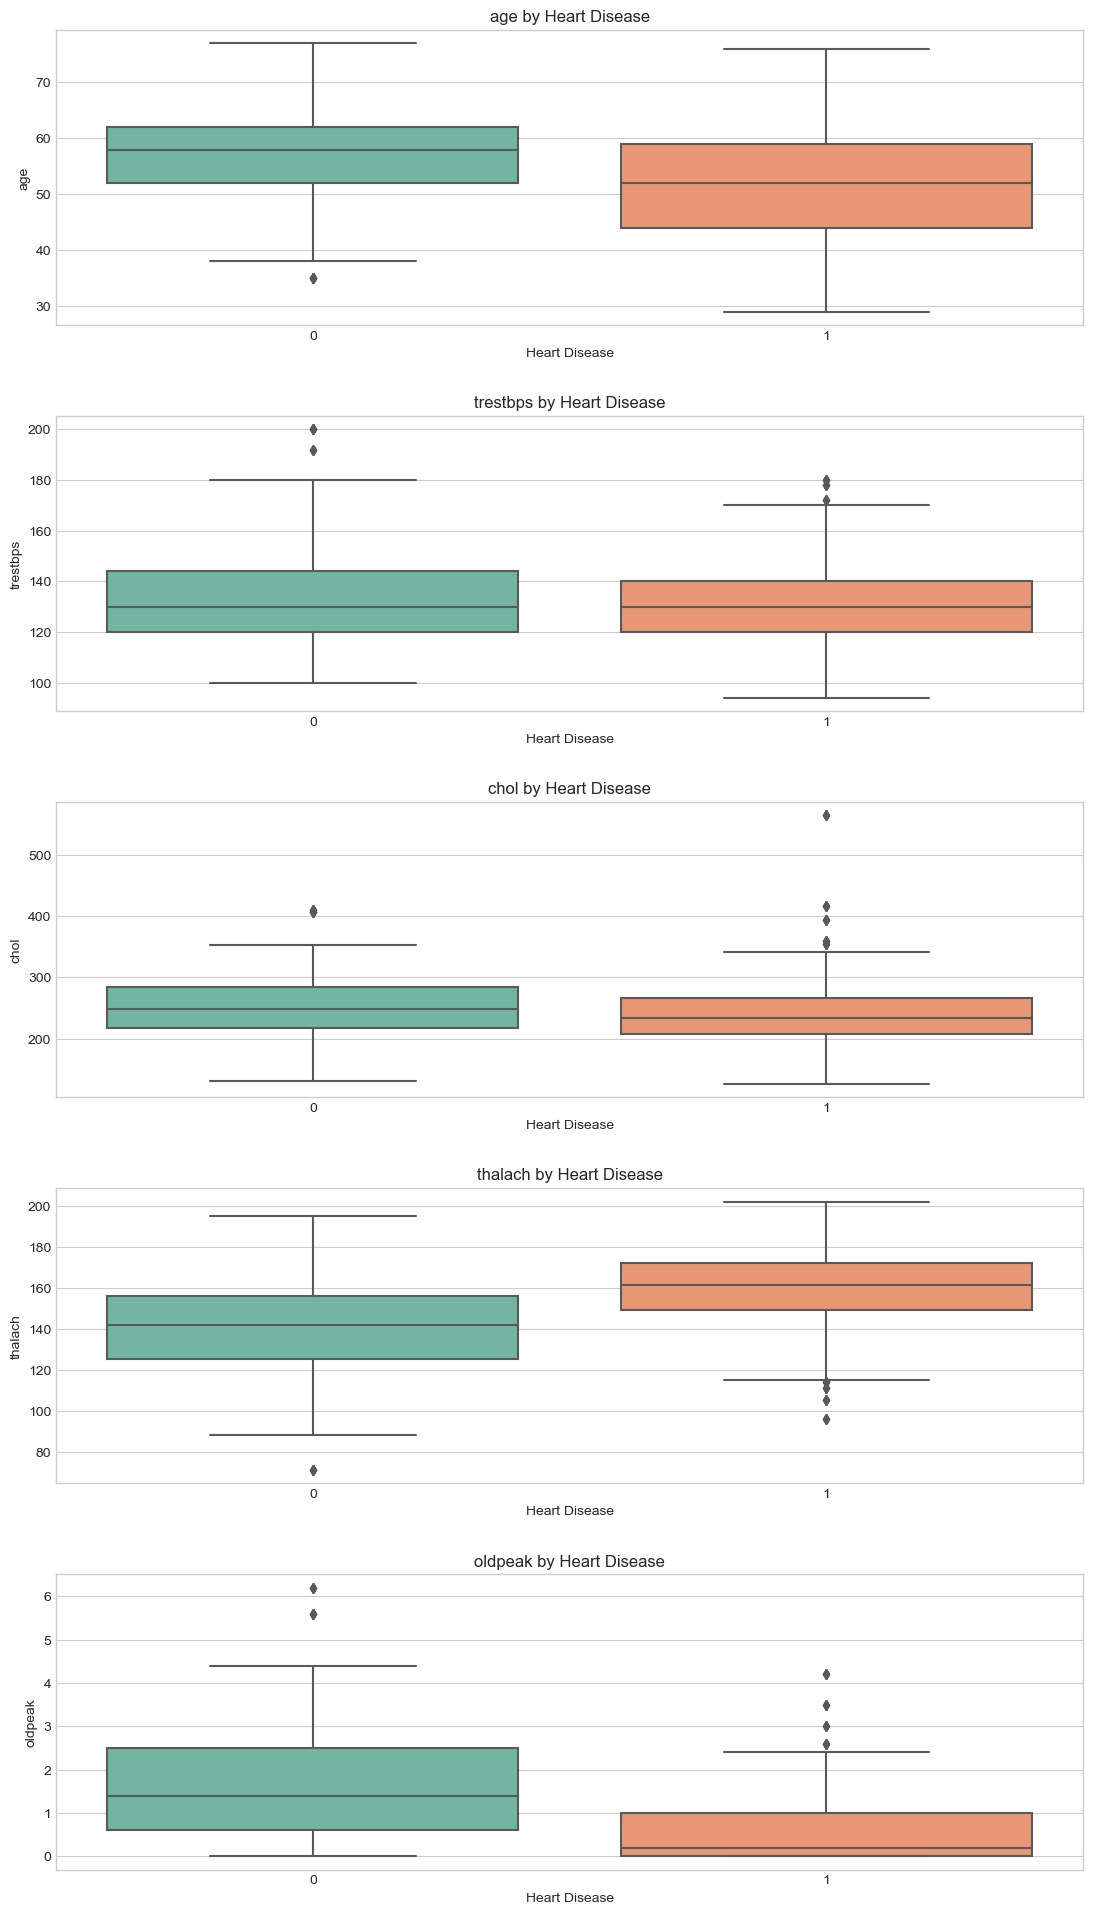

In [8]:
# Step 11: Create boxplots for continuous variables
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(len(continuous_features), 1, figsize=(12, 20))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(continuous_features):
    sns.boxplot(x='target', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} by Heart Disease')
    axes[i].set_xlabel('Heart Disease')
    axes[i].set_ylabel(feature)

plt.show()

/Users/quanhongjin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


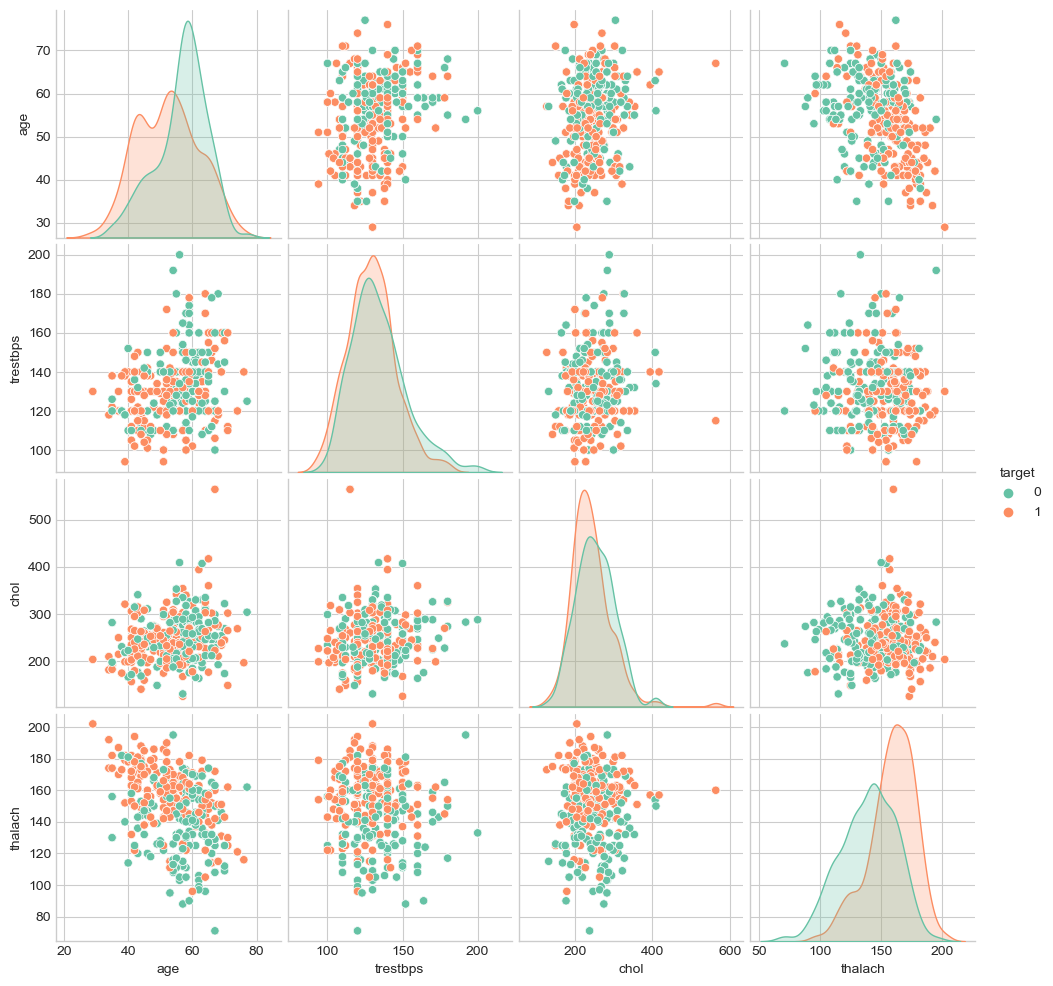

Saved preprocessed data to ../data/processed/heart_processed.csv


In [9]:
# Step 12: Create pairplot for selected features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(df[selected_features], hue='target')
plt.show()

# Step 13: Preprocess data and save
# Basic preprocessing
# Create processed directory if it doesn't exist
import os
os.makedirs('../data/processed', exist_ok=True)

# Save preprocessed data
df.to_csv('../data/processed/heart_processed.csv', index=False)
print(f"Saved preprocessed data to ../data/processed/heart_processed.csv")